# Import SVM model outputs and use to generate word clouds for cluster analysis

## Gareth Walker


In [32]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt



def return_cluster_words(List_Tup): # recieves a list of tuples giving CIRI lable and respective score
    cluster_df = pd.DataFrame(columns=['Top_words','Top_words_coefs','CIRI_label'])
    top_features =20

    for tup in List_Tup:
        ciri_label = tup[0]
        score= tup[1]
        
        
        if score >= 2: # Controlls for good scores, which dont need to be summarised in word cloud.
            continue
        
        df_class = df_model_features[df_model_features['Class']==ciri_label]

        # lookup top words and coefs
        #top_coefs = coefs[top_positive_coefficients]
        #feature_names = np.array(feature_names)
        #top_words = feature_names[top_positive_coefficients]
        
        # export to DF
        tup_df = pd.DataFrame()
        
        tup_df['Top_words']=df_class['Top words '+str(score)]
        tup_df['Top_words_coefs']=df_class['Top word coefs '+str(score)]
        
        tup_df['CIRI_label']=ciri_label
        cluster_df = cluster_df.append(tup_df)
        cluster_df.reset_index(inplace=True)
    return cluster_df

def generate_cloud_text(df):
    
    for i in range(len(df.index)):
        df.loc[i,'Wieghted_string'] = (df.loc[i,'Top_words']+' ') * int(df.loc[i,'Top_words_coefs']*10000)

    output = df['Wieghted_string'].str.cat(sep=' ')
    return output


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        collocations=False,
        #stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10, 30))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
def cluster_word_cloud(List_Tup):
    cluster_df = return_cluster_words(List_Tup)
    wieghted_text = generate_cloud_text(cluster_df)
    show_wordcloud(wieghted_text)

In [25]:
df_model_features = pd.read_csv('../data/SVM_Features.csv')

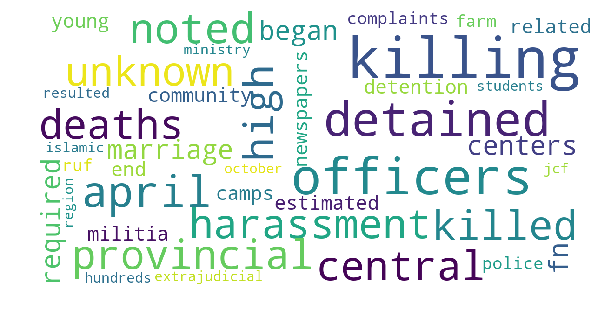

In [35]:
test_list =[('KILL',0),('DISAP',1)]
cluster_word_cloud(test_list)

In [ ]:
cluster_data = pd.read_csv('../data/')